In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans

In [13]:
# Given data points
points = np.array([[1, 1], [1, 3], [2, 2], [3, 1], [4, 4], [8, 1], [8, 3], [9, 2], [10, 1], [10, 3]])

In [14]:
# Initial cluster centers
initial_centers = np.array([[1, 1], [4, 4]])

# Compute distances from initial cluster centers
distance_from_C1 = [euclidean(p, initial_centers[0]) for p in points]
distance_from_C2 = [euclidean(p, initial_centers[1]) for p in points]

# Assign clusters
clusters = ['C1' if d1 < d2 else 'C2' for d1, d2 in zip(distance_from_C1, distance_from_C2)]

In [15]:
# Convert to DataFrame
data = pd.DataFrame(points, columns=['X', 'Y'])
data['Distance from C1(1,1)'] = distance_from_C1
data['Distance from C2(4,4)'] = distance_from_C2
data['Cluster'] = clusters

# Display results
print("Initial Cluster Assignment:")
print(data)


Initial Cluster Assignment:
    X  Y  Distance from C1(1,1)  Distance from C2(4,4) Cluster
0   1  1               0.000000               4.242641      C1
1   1  3               2.000000               3.162278      C1
2   2  2               1.414214               2.828427      C1
3   3  1               2.000000               3.162278      C1
4   4  4               4.242641               0.000000      C2
5   8  1               7.000000               5.000000      C2
6   8  3               7.280110               4.123106      C2
7   9  2               8.062258               5.385165      C2
8  10  1               9.000000               6.708204      C2
9  10  3               9.219544               6.082763      C2


In [16]:
# Applying K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(points)

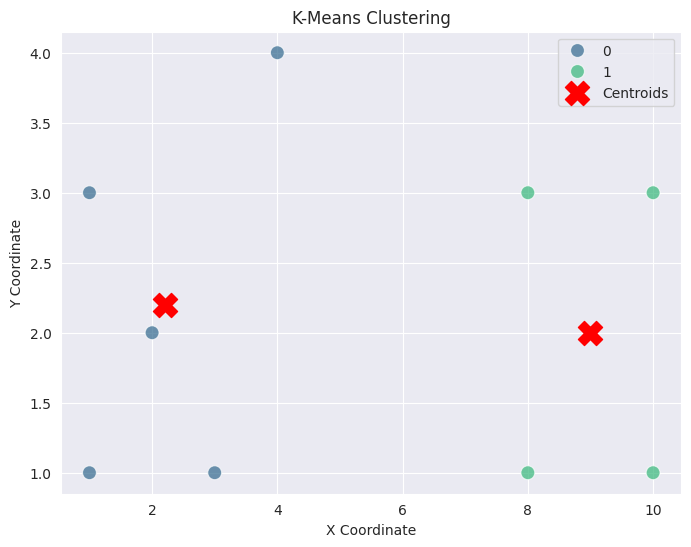

In [17]:
# Plot the clusters in 2D space
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['X'], y=data['Y'], hue=data['Cluster_KMeans'], palette='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [18]:
# Display new cluster centers
print("New Cluster Centers:")
print(kmeans.cluster_centers_)

New Cluster Centers:
[[2.2 2.2]
 [9.  2. ]]
